In [4]:
%pip install numpy matplotlib seaborn pandas


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np

NUM_STEPS = 1000 # time steps
NUM_RUNS = 2000
epsilon = 0.1

def run_k_bandit_experiment(k, epsilon):
    all_rewards = np.zeros((NUM_RUNS, NUM_STEPS))

    for run in range(NUM_RUNS):
        Q = np.zeros(k) # average reward for each action within a given run
        N = np.zeros(k) # number of times each action has been taken within a given run
        for step in range(NUM_STEPS):
            if np.random.rand() < epsilon:
                # explore
                action = np.random.randint(0, k)
            else:
                # exploit
                action = np.argmax(Q)
            
            reward = np.random.normal(loc=Q[action], scale=1)
            all_rewards[run, step] = reward
            # update the number of times the action has been taken
            N[action] += 1
            # updates the current reward for action TOWARDS the sampled reward by calculating the sample-average
            Q[action] += (reward - Q[action]) / N[action]

    return all_rewards.mean(axis=0)

In [72]:
run_k_bandit_experiment(10, 0.01)

array([0.01535993, 0.35527516, 0.55874937, 0.6994737 , 0.82170343,
       0.92270059, 0.97981635, 0.99954914, 1.04682657, 1.09751966,
       1.13725822, 1.14538441, 1.1572197 , 1.16040048, 1.18854276,
       1.18670568, 1.20563246, 1.22568517, 1.20445086, 1.23839282,
       1.22596656, 1.26840371, 1.2744755 , 1.25559922, 1.2434293 ,
       1.28501761, 1.24992057, 1.23959731, 1.26609026, 1.23712059,
       1.27572991, 1.27926635, 1.23261415, 1.2665151 , 1.28971072,
       1.26781491, 1.28669124, 1.29011483, 1.25998566, 1.29892873,
       1.27417306, 1.30579563, 1.28275446, 1.29702813, 1.27584255,
       1.28412192, 1.2634555 , 1.30640179, 1.29505325, 1.33488033,
       1.34334592, 1.2868139 , 1.28597978, 1.32529865, 1.2912865 ,
       1.27834947, 1.29377444, 1.29510768, 1.28144162, 1.35058399,
       1.31237942, 1.33981039, 1.33674784, 1.28596993, 1.31493556,
       1.31977243, 1.31725179, 1.31716422, 1.33108214, 1.27120144,
       1.30186362, 1.28122747, 1.29873029, 1.35689406, 1.31806

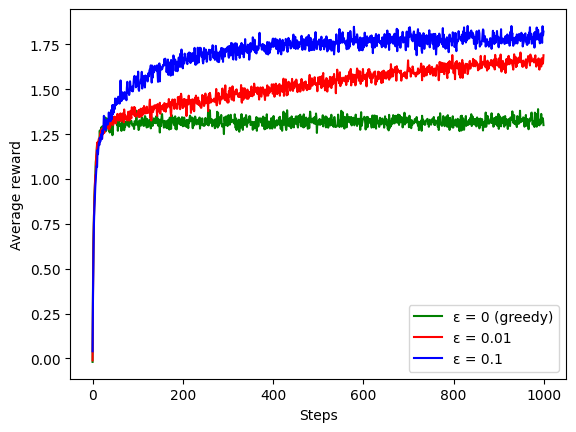

In [73]:
import matplotlib.pyplot as plt

k = 10

for eps, color in [(0, 'green'), (0.01, 'red'), (0.1, 'blue')]:
    avg_rewards = run_k_bandit_experiment(k,eps)
    label = f'ε = {eps}' if eps > 0 else 'ε = 0 (greedy)'
    plt.plot(avg_rewards, color=color, label=label)

plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.legend()
plt.show()
